In [1]:
import time_tech_aggregation as tta
import seaborn as sns
import matplotlib.pyplot as plt
from mplfonts import use_font

In [2]:
use_font('Songti SC')

In [3]:
first_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/level1.xlsx'
second_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/level2.xlsx'
cref_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/color_index.xlsx'

data = tta.Data(first_path, second_path, cref_path=cref_path, pref_path='/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/Province_SubProvince.xlsx', province='Heilongjiang')

AttributeError: 'Data' object has no attribute 'aggregated_dataframe'

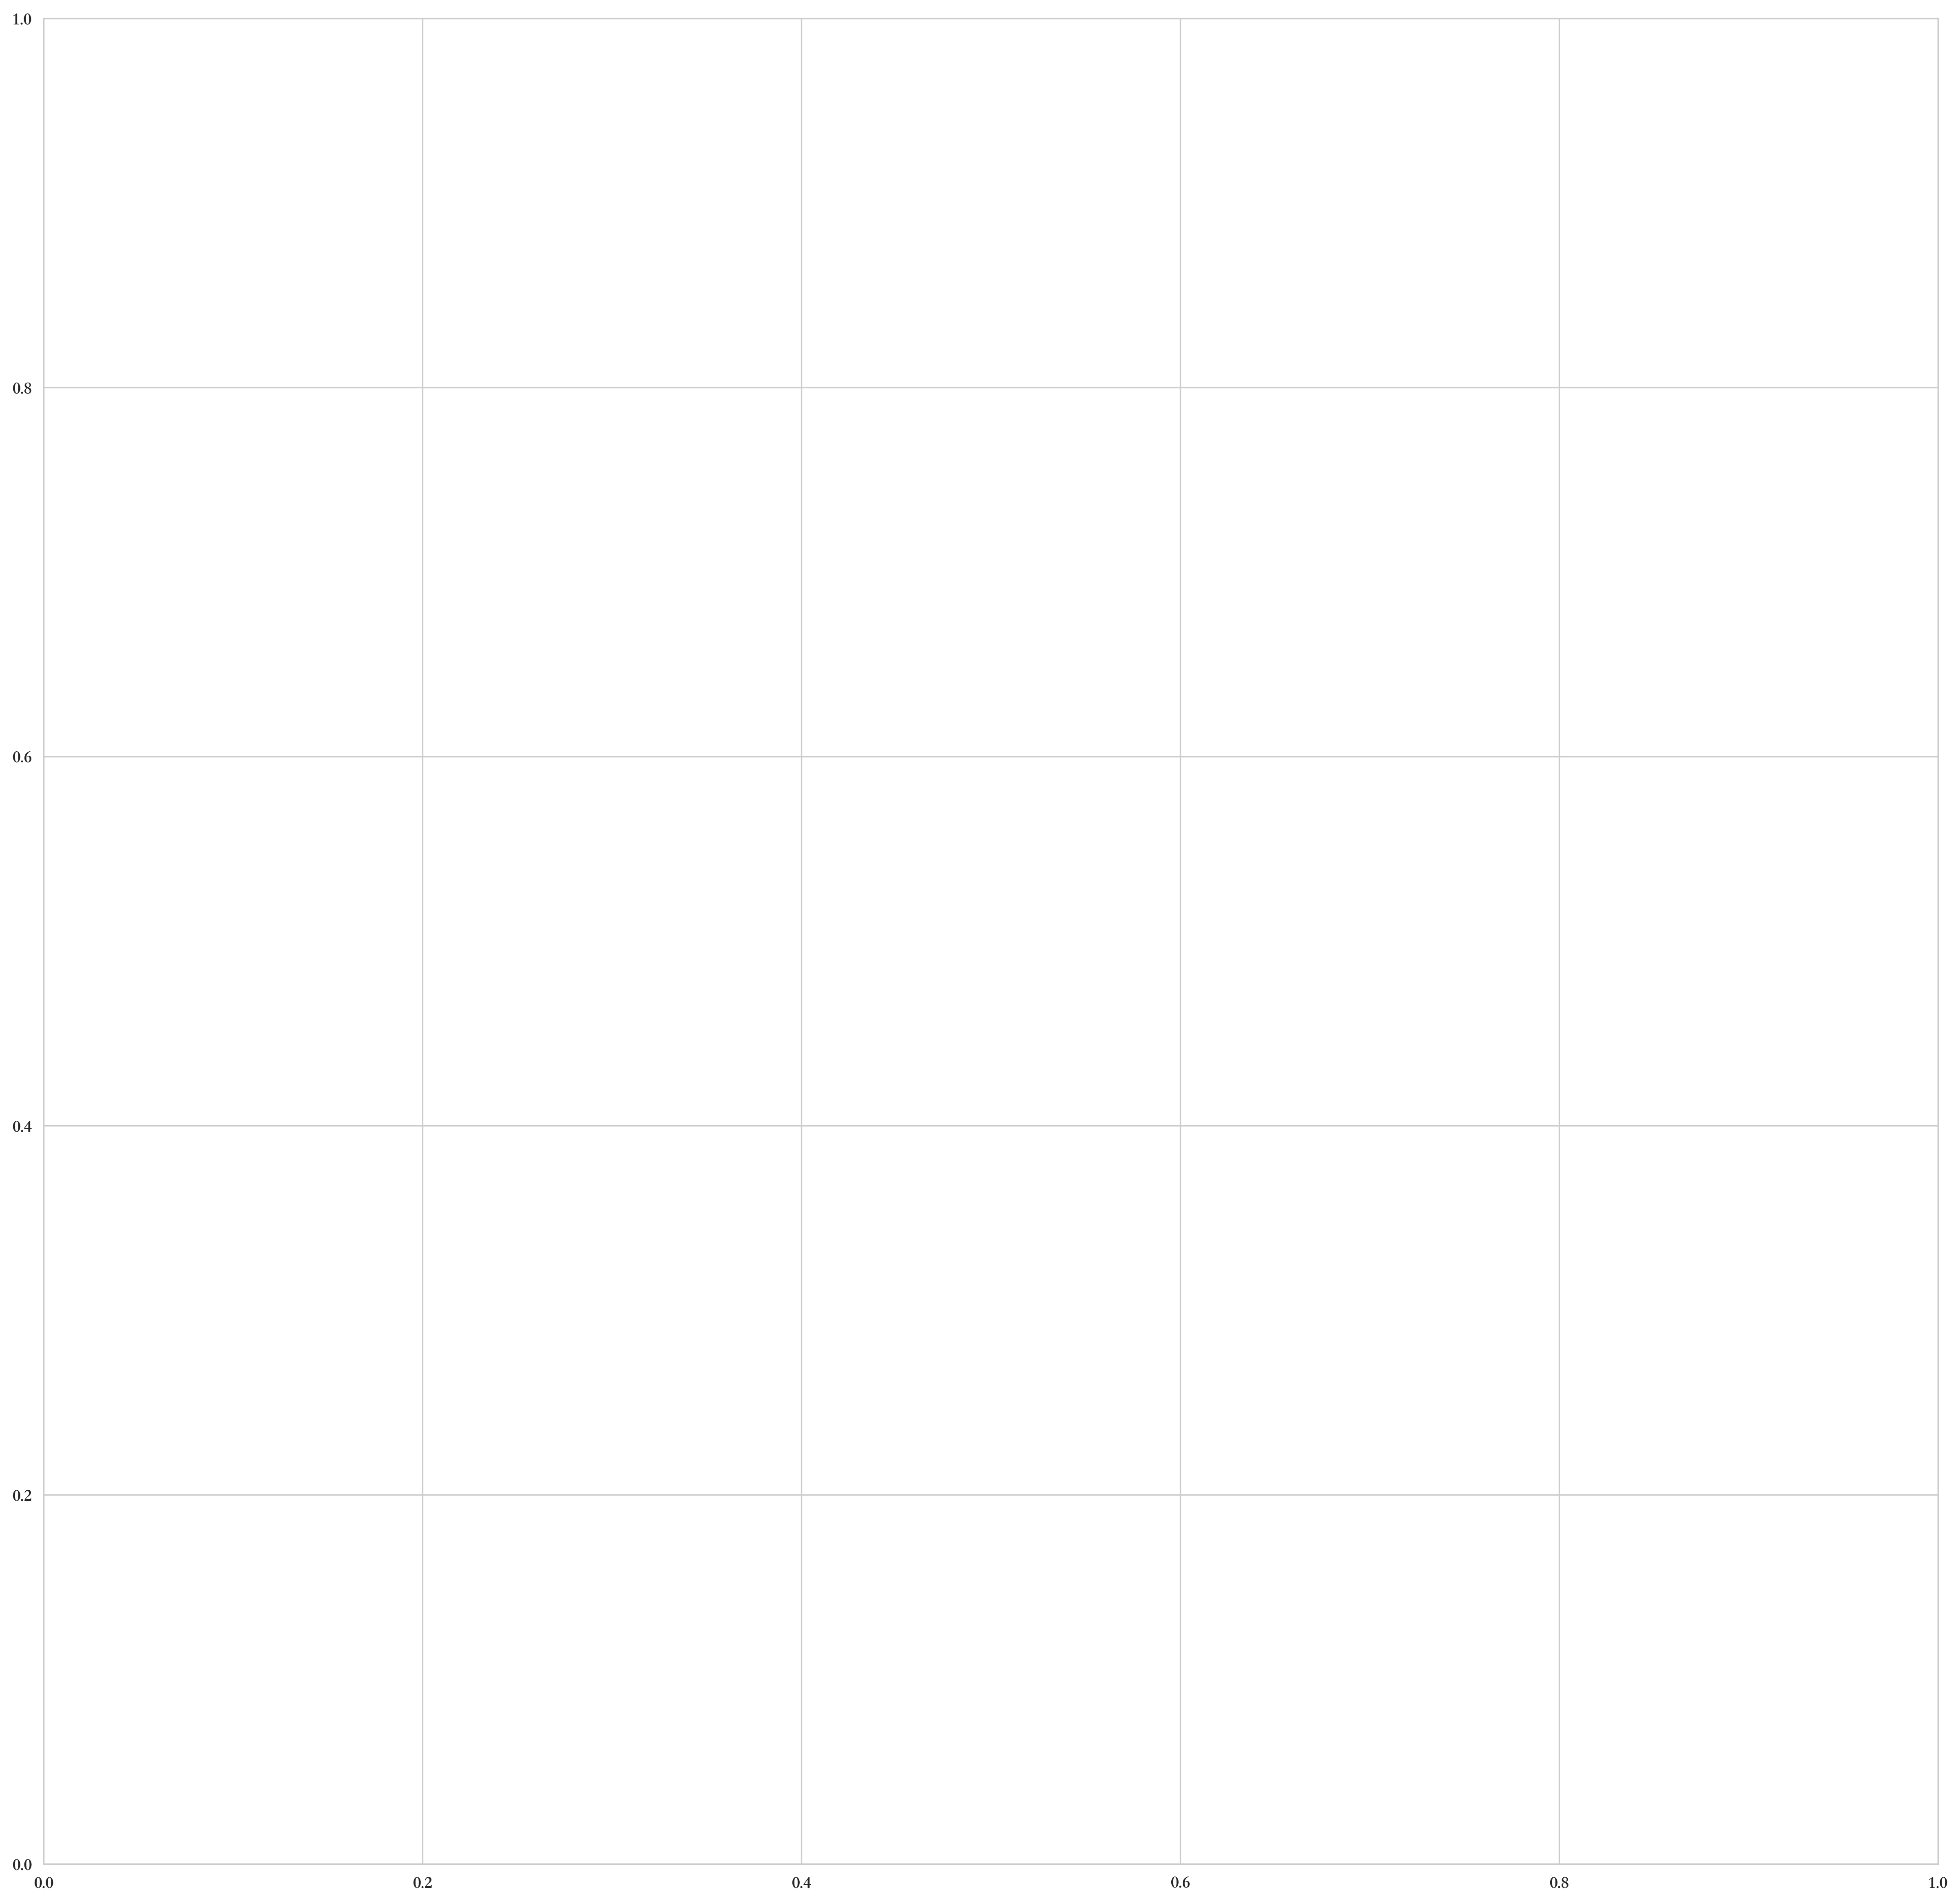

In [4]:
data.stack_plot()

In [ ]:
hebei_data = tta.Data(first_path, second_path, cref_path=cref_path, pref_path='/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/Province_SubProvince.xlsx', province='Hebei_A')

In [ ]:
hebei_data.stack_plot()

In [5]:
data.dataframe.groupby(by=['年份', '省份', '星期', '时刻', 'Tech_Group']).sum()

,,,,,Level
年份,省份,星期,时刻,Tech_Group,


In [ ]:
data